In [1]:
from eda_combined import *

In [2]:
bureau = pd.read_csv(r"C:\Users\TRITON\OneDrive - National Economics University\NEU\NEU\lap trinh\Data preparation and Visualization\Final project\dseb63_final_project_DP_dataset\dseb63_final_project_DP_dataset\dseb63_bureau.csv")
app_train = pd.read_csv(r"C:\Users\TRITON\OneDrive - National Economics University\NEU\NEU\lap trinh\Data preparation and Visualization\Final project\dseb63_final_project_DP_dataset\dseb63_final_project_DP_dataset\dseb63_application_train.csv")

## 1. Overall

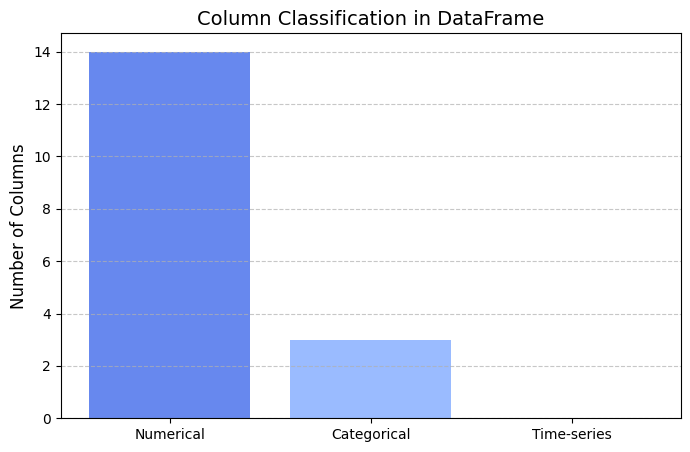

In [3]:
display_dataframe_info(bureau)

##### Of the 17 columns in the table, 14 are of the numerical (int, float) type and 3 are of the categorical (object) type.

c:\Users\TRITON\OneDrive - National Economics University\NEU\NEU\lap trinh\Data preparation and Visualization\Final project\data prep\eda_combined.py:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


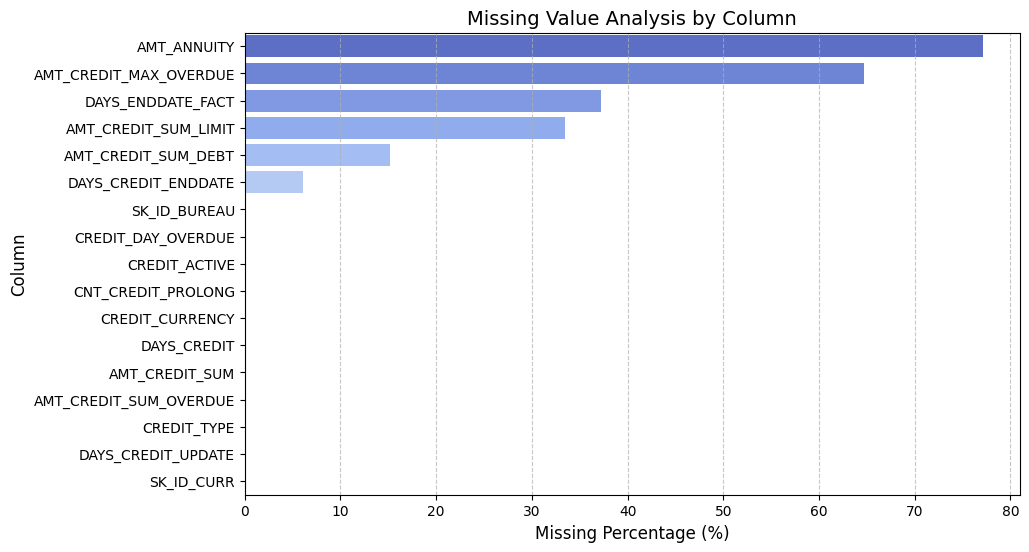

In [4]:
analyze_missing_values(bureau)

##### There are 6 columns containing null values ​​out of 17 columns, of which 4 columns are related to amount, the remaining 2 columns are number of days. There are 2 columns with > 60% null values, AMT_ANNUITY and AMT_CREDIT_MAX_OVERDUE, 2 columns with null values ​​> 30% and 2 columns below 20%.

In [5]:
basic_statistics_summary(bureau)

## 2. EDA

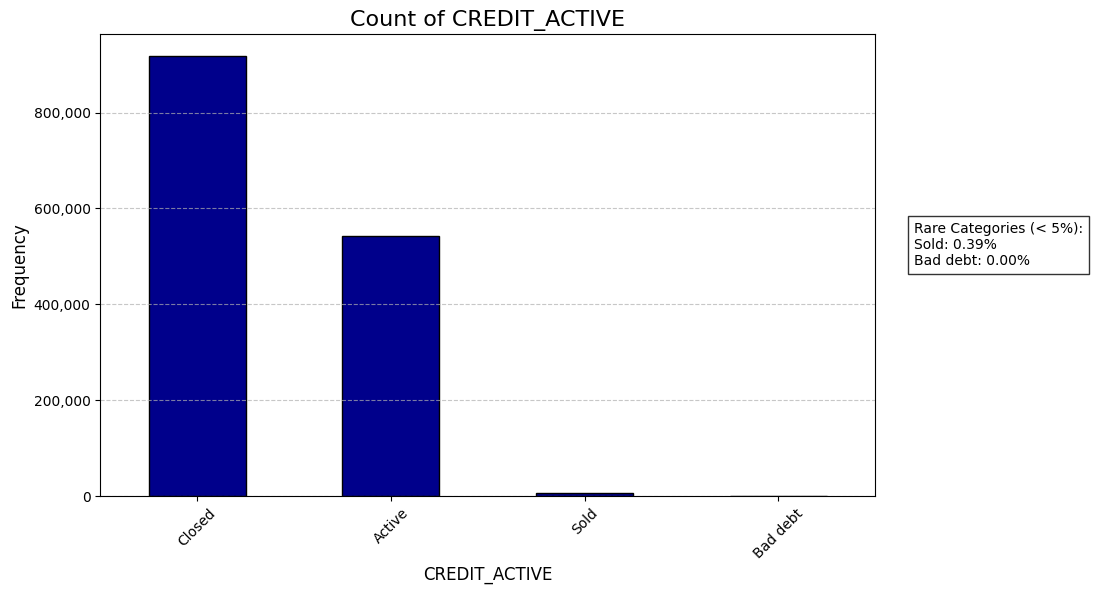

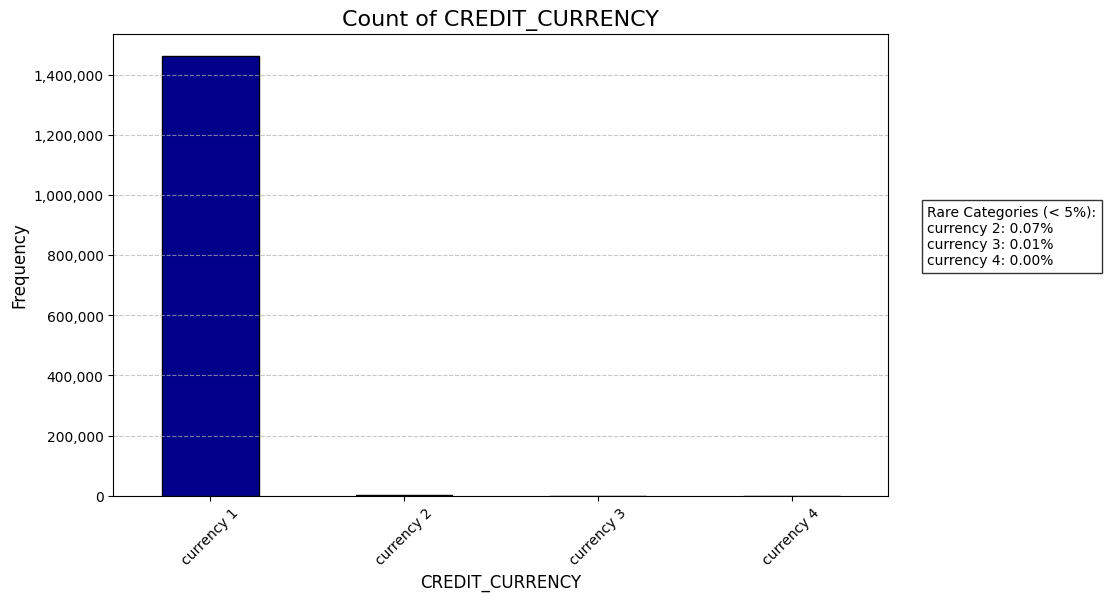

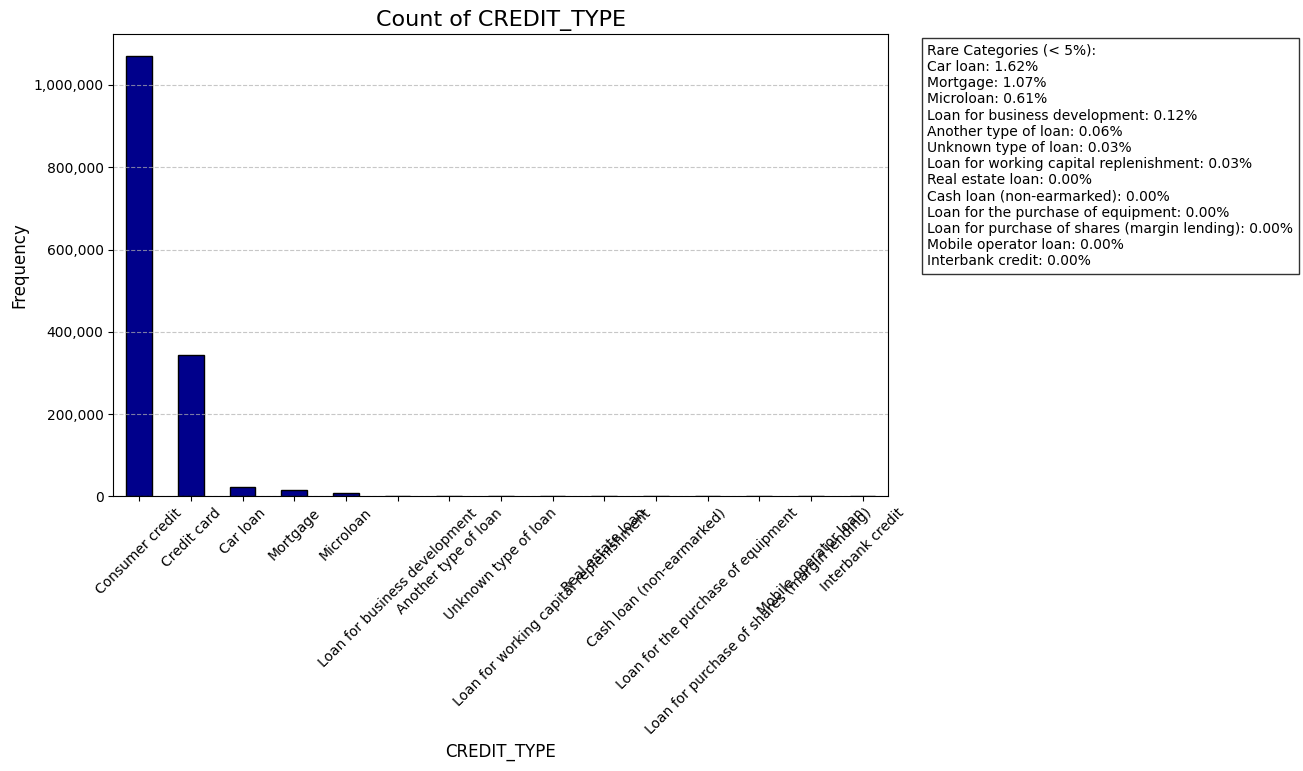

In [6]:
visualize_cate_with_rare_and_binary(bureau, 5)

##### It is easy to see that in all 3 categorical columns, the difference between the values ​​in the column is quite large:
- In the CREDIT_ACTIVE column, there are 4 different values, in which the values ​​"Closed" and "Active" are the majority, "Sold" is 0.39% and "Bad Debt" is 0%.
- In the CREDIT_CURRENCY column, "currency 1" is the majority value, accounting for more than 99%, "currency 2", "currency 3" and "currency 4" only account for a total of 0.08% of the total values ​​of the column.
- With the CREDIT_TYPE column, there are a total of 13 out of 15 unique values ​​with a frequency ratio of less than 5%, only the two values ​​"Consumer credit" and "Credit card" are not in this group.

In [7]:
merged_bureau = merge_target(bureau, app_train, key_col= 'SK_ID_CURR', target_col= 'TARGET')

Successfully merged 'TARGET' column into the data.


## Checking outlier


=== Outlier Detection and Handling ===


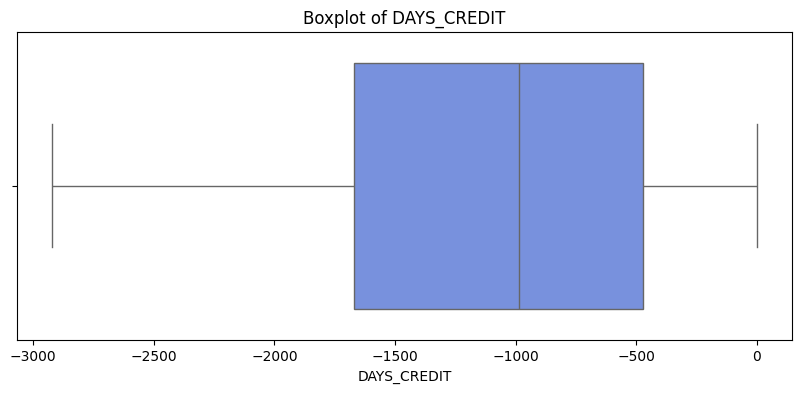

No outliers detected in column DAYS_CREDIT.


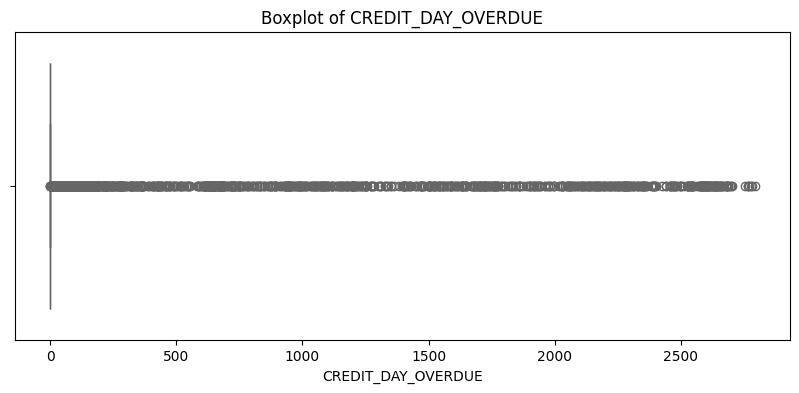

Outliers detected in column CREDIT_DAY_OVERDUE: 1062 rows


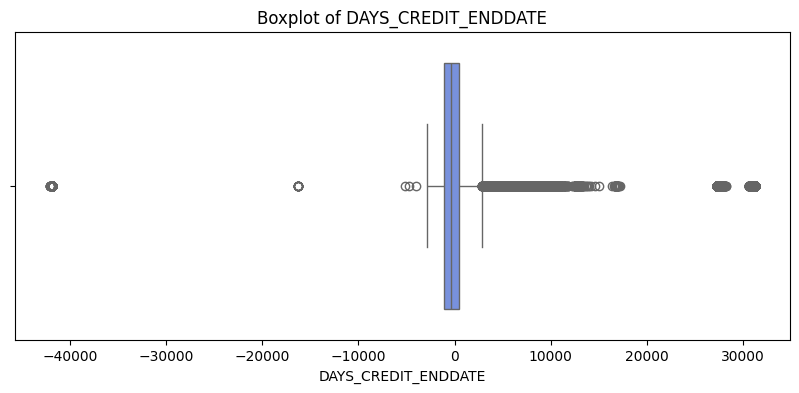

Outliers detected in column DAYS_CREDIT_ENDDATE: 32549 rows


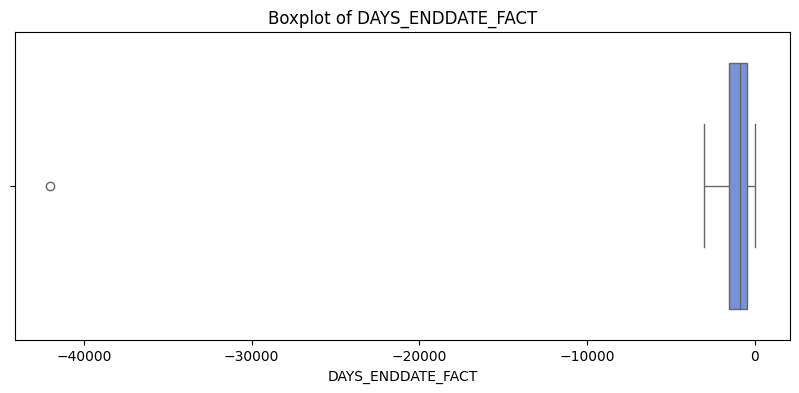

Outliers detected in column DAYS_ENDDATE_FACT: 1 rows


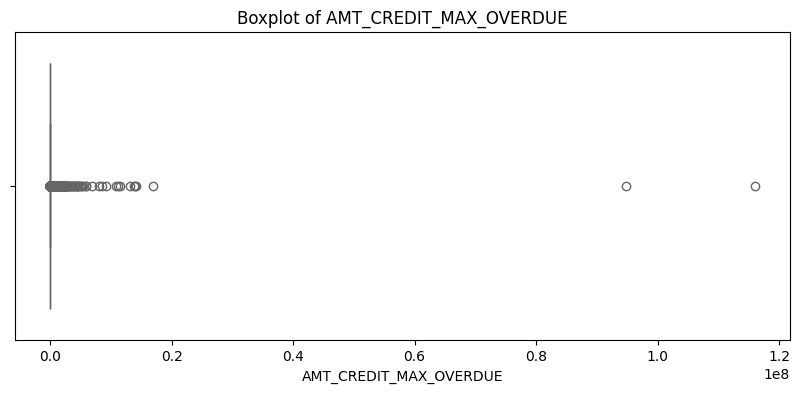

Outliers detected in column AMT_CREDIT_MAX_OVERDUE: 170 rows


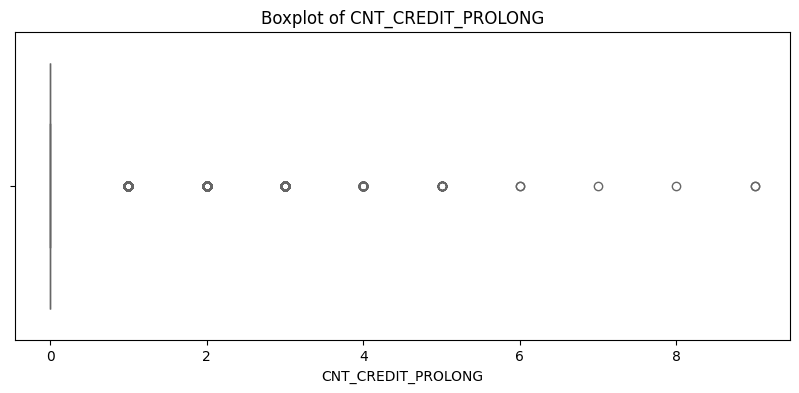

Outliers detected in column CNT_CREDIT_PROLONG: 8820 rows


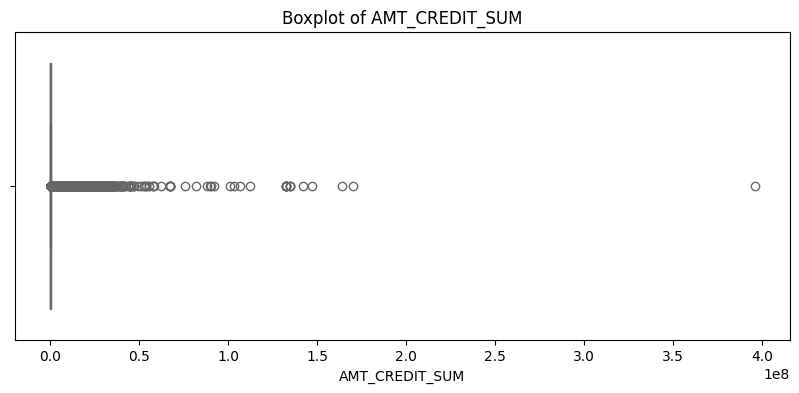

Outliers detected in column AMT_CREDIT_SUM: 15406 rows


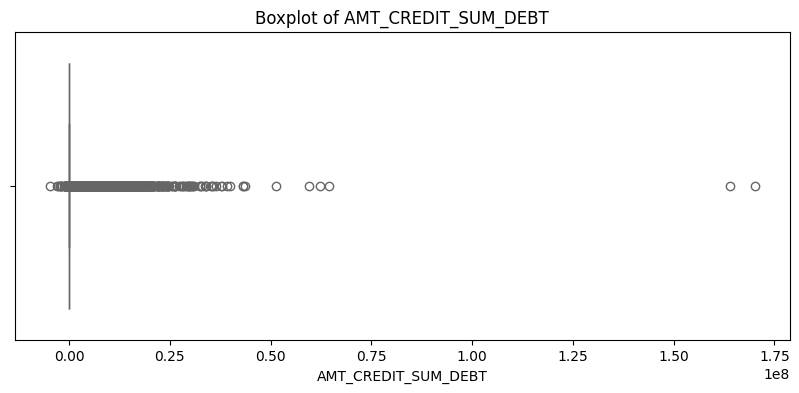

Outliers detected in column AMT_CREDIT_SUM_DEBT: 13235 rows


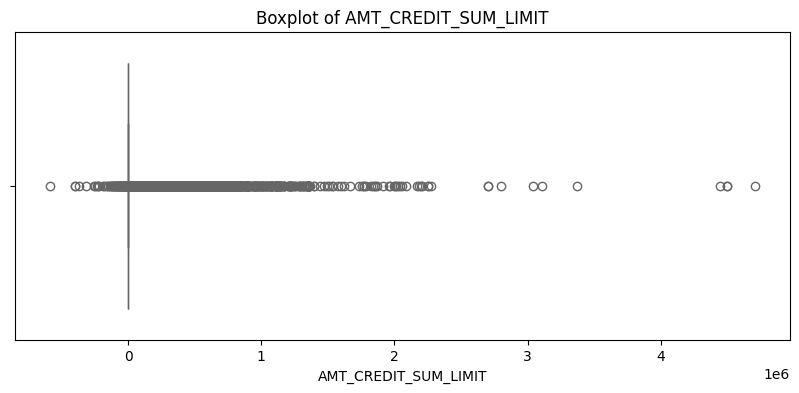

Outliers detected in column AMT_CREDIT_SUM_LIMIT: 13939 rows


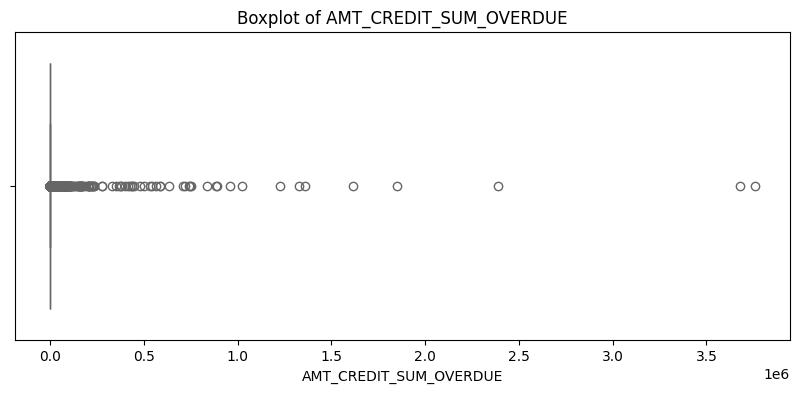

Outliers detected in column AMT_CREDIT_SUM_OVERDUE: 367 rows


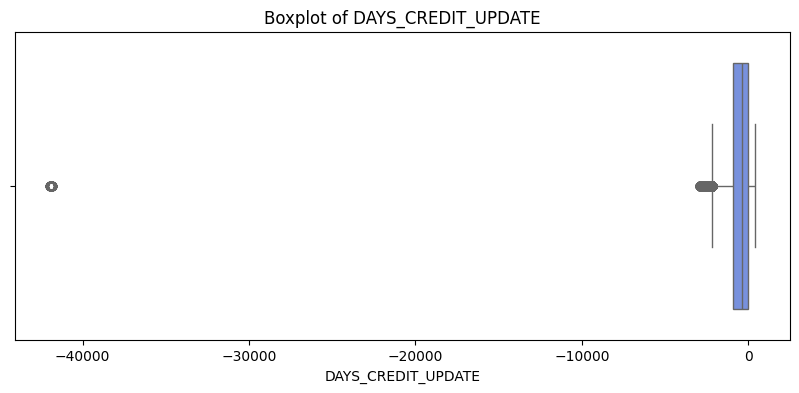

Outliers detected in column DAYS_CREDIT_UPDATE: 473 rows


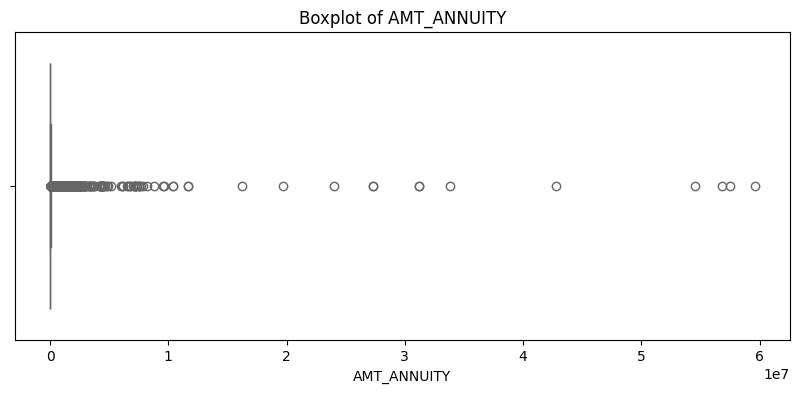

Outliers detected in column AMT_ANNUITY: 381 rows


In [8]:
checking_outlier(bureau)

##### There are 4 columns of values ​​with a large number of outliers, namely DAYS_CREDIT_ENDDATE, AMT_CREDIT_SUM, AMT_CREDIT_SUM_DEBT, AMT_CREDIT_SUM_LIMIT, with a number of outliers greater than 10000 values ​​for various reasons.

## Checking imbalance


=== Checking for Imbalanced Columns ===
Column 'CREDIT_ACTIVE' is imbalanced:
CREDIT_ACTIVE
Closed      0.626300
Active      0.369829
Sold        0.003858
Bad debt    0.000014
Name: proportion, dtype: float64


c:\Users\TRITON\OneDrive - National Economics University\NEU\NEU\lap trinh\Data preparation and Visualization\Final project\data prep\eda_combined.py:291: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.index, y=top_features.values, palette="coolwarm")


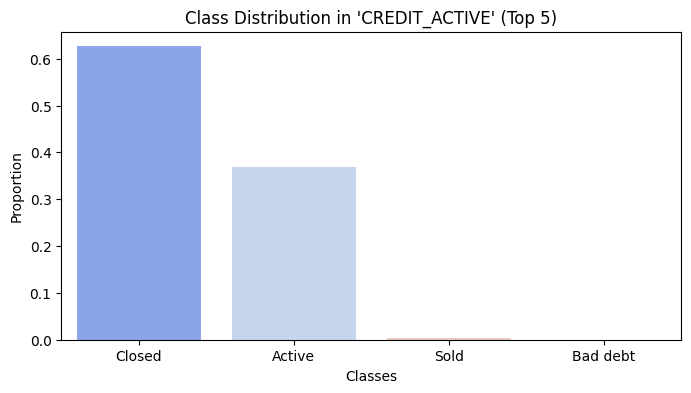

Column 'CREDIT_CURRENCY' is imbalanced:
CREDIT_CURRENCY
currency 1    0.999160
currency 2    0.000732
currency 3    0.000102
currency 4    0.000006
Name: proportion, dtype: float64


c:\Users\TRITON\OneDrive - National Economics University\NEU\NEU\lap trinh\Data preparation and Visualization\Final project\data prep\eda_combined.py:291: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.index, y=top_features.values, palette="coolwarm")


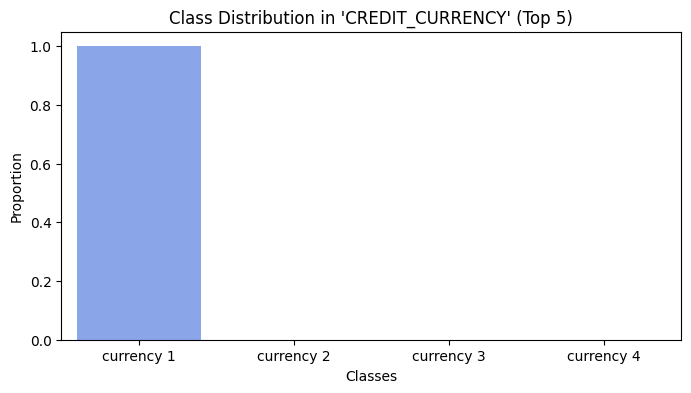

Column 'CREDIT_TYPE' is imbalanced:
CREDIT_TYPE
Consumer credit                                 7.299473e-01
Credit card                                     2.346599e-01
Car loan                                        1.621279e-02
Mortgage                                        1.065088e-02
Microloan                                       6.145394e-03
Loan for business development                   1.174483e-03
Another type of loan                            5.828059e-04
Unknown type of loan                            3.221128e-04
Loan for working capital replenishment          2.572808e-04
Real estate loan                                1.569618e-05
Cash loan (non-earmarked)                       1.569618e-05
Loan for the purchase of equipment              1.160152e-05
Loan for purchase of shares (margin lending)    2.729770e-06
Mobile operator loan                            6.824425e-07
Interbank credit                                6.824425e-07
Name: proportion, dtype: float64


c:\Users\TRITON\OneDrive - National Economics University\NEU\NEU\lap trinh\Data preparation and Visualization\Final project\data prep\eda_combined.py:291: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.index, y=top_features.values, palette="coolwarm")


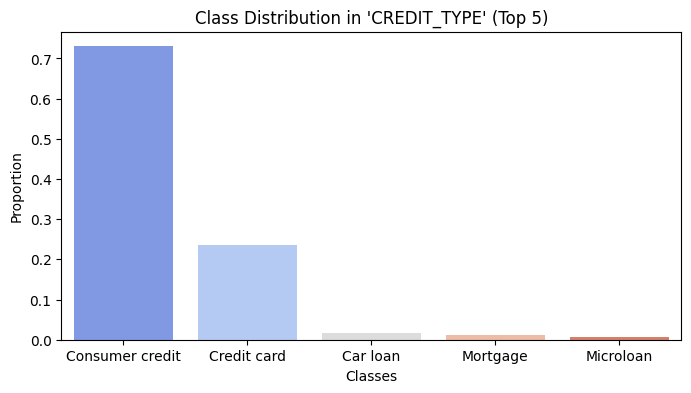

In [9]:
checking_imbalance(merged_bureau, target='TARGET')

##### The 3 columns CREDIT_ACTIVE, CREDIT_CURRENCY, CREDIT_TYPE have a very large imbalanced ratio, only 1-2 values ​​in the column account for a large proportion, the rest of the values ​​only account for less than 5%.


=== Low-Variance Feature Detection ===


c:\Users\TRITON\OneDrive - National Economics University\NEU\NEU\lap trinh\Data preparation and Visualization\Final project\data prep\eda_combined.py:322: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=numeric_cols, y=variances, palette="viridis")


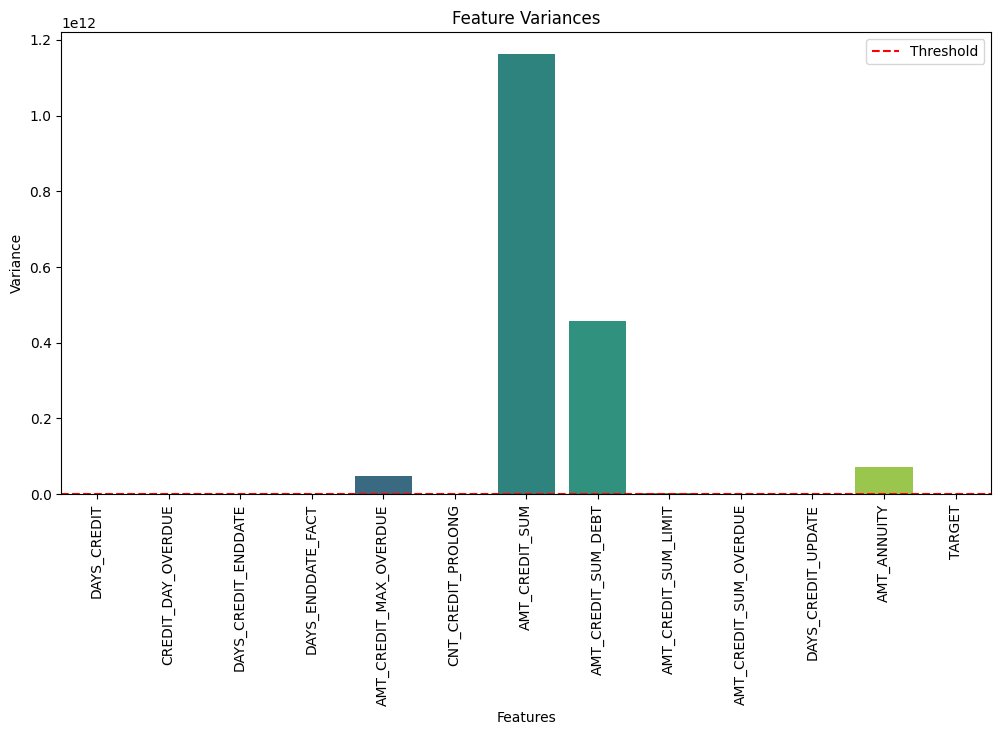

No low-variance columns detected.


[]

In [10]:
low_variance(merged_bureau)

## Heatmap

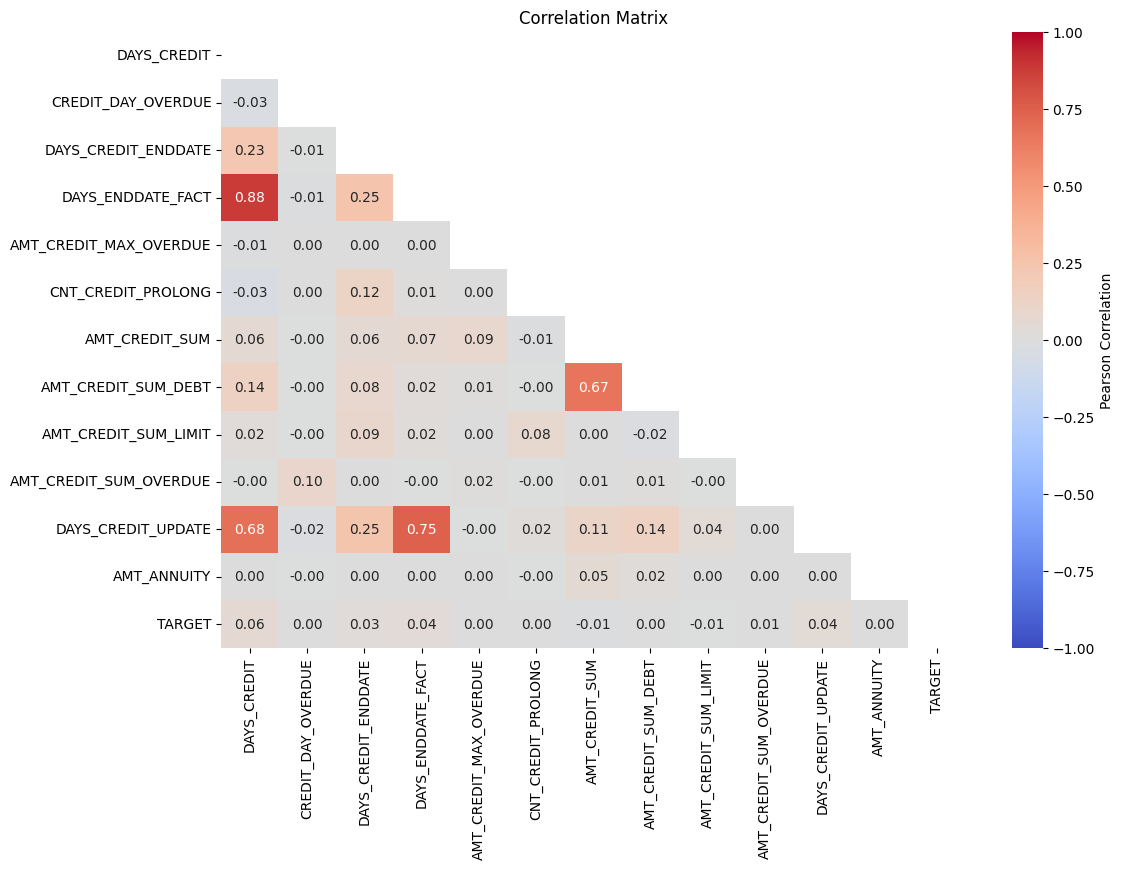


Strong correlations above threshold:
           Variable 1           Variable 2  Correlation
2         DAYS_CREDIT    DAYS_ENDDATE_FACT     0.875291
39  DAYS_ENDDATE_FACT   DAYS_CREDIT_UPDATE     0.745192
9         DAYS_CREDIT   DAYS_CREDIT_UPDATE     0.683189
57     AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT     0.667766


In [11]:
correlation_matrix(merged_bureau)

## Analyze numerical relationships


Generating pairplot for numerical variables...


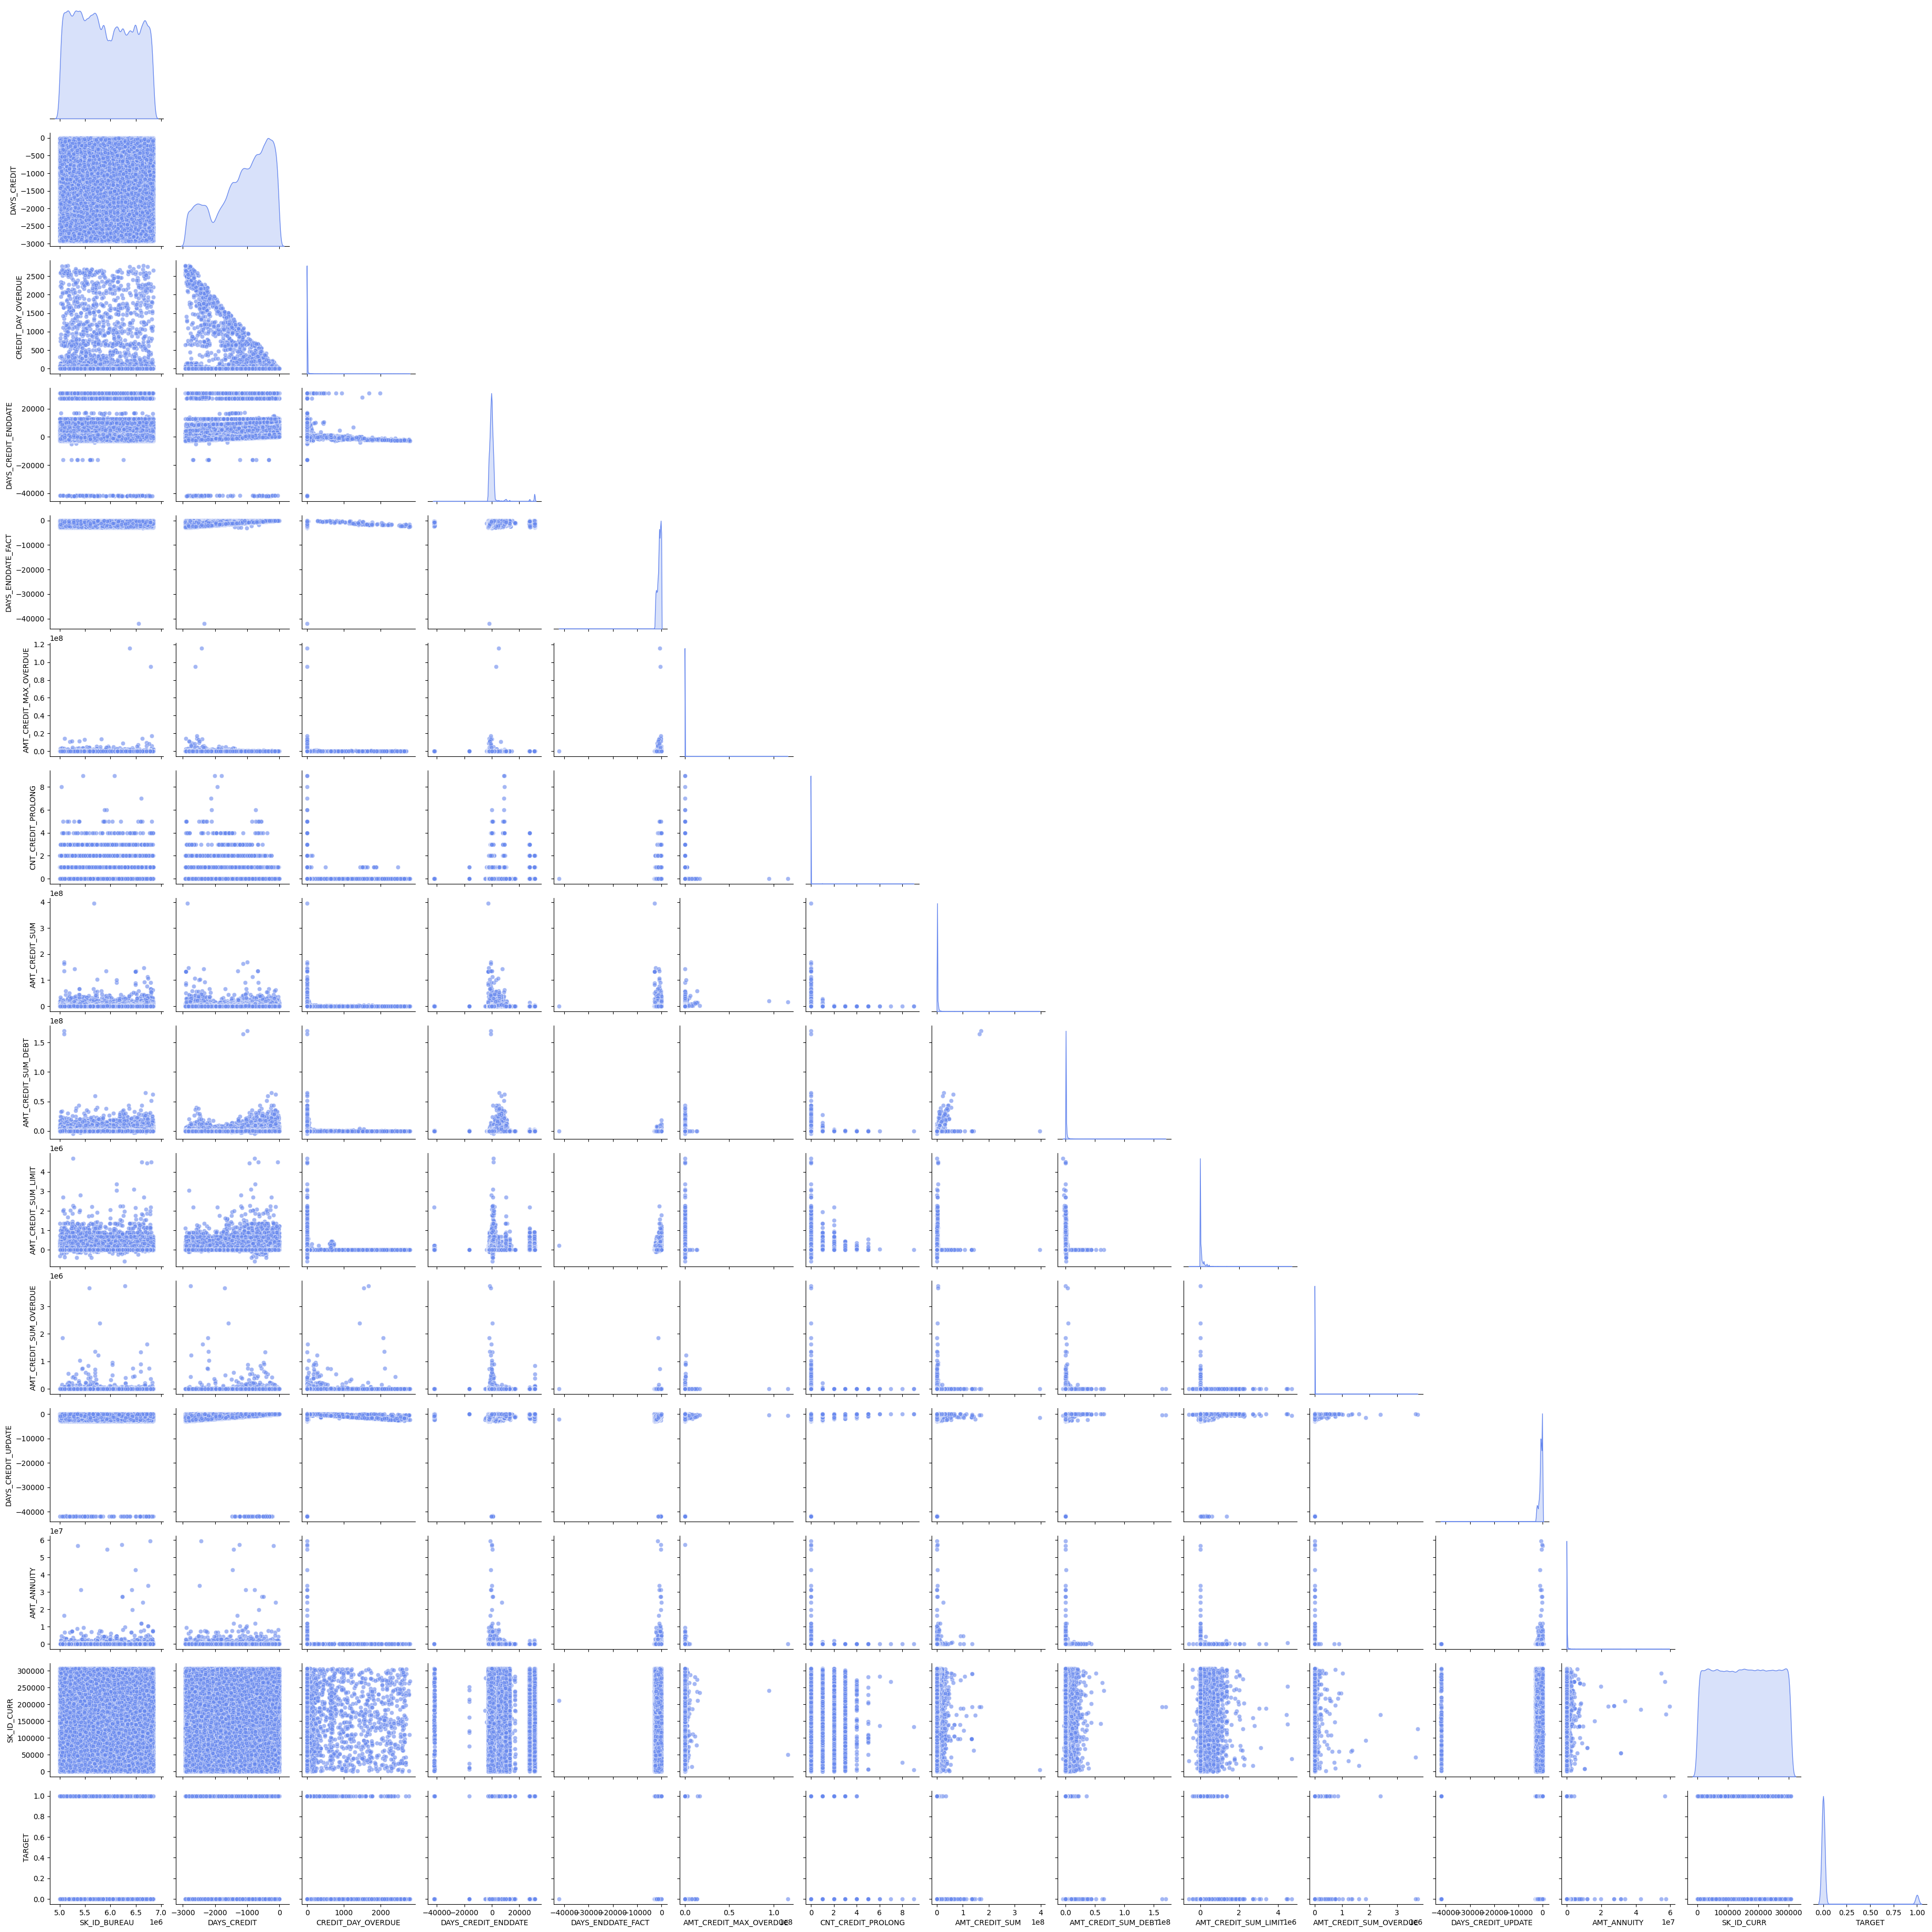

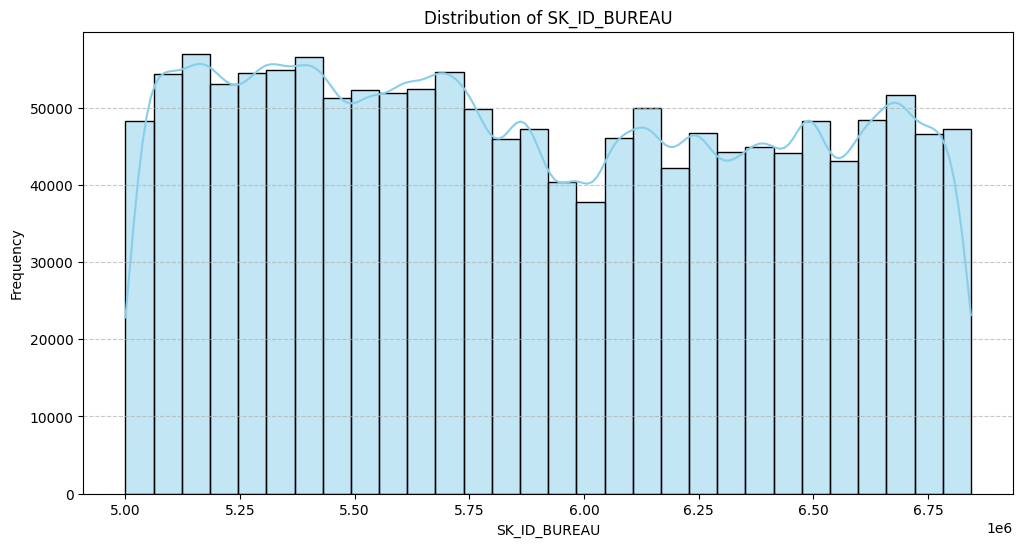

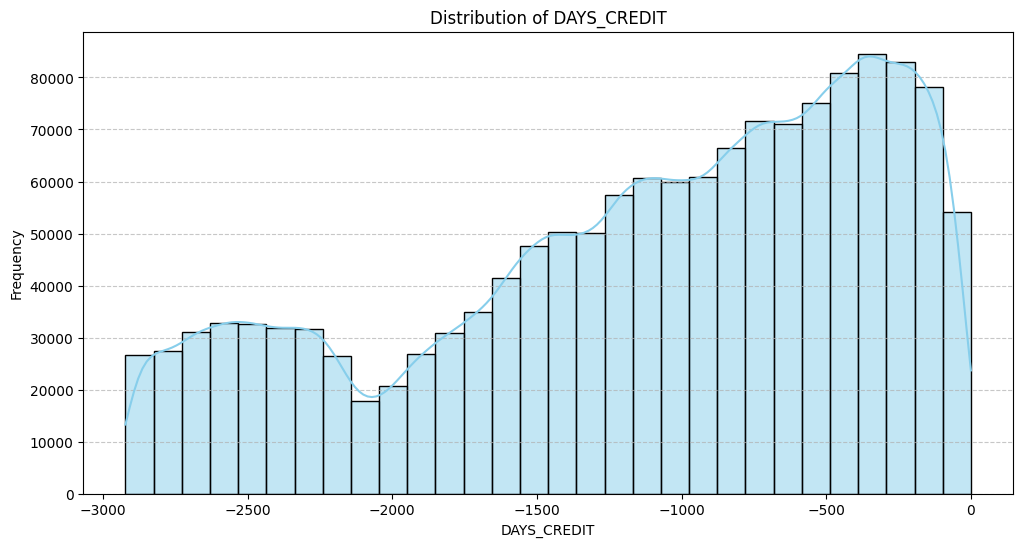

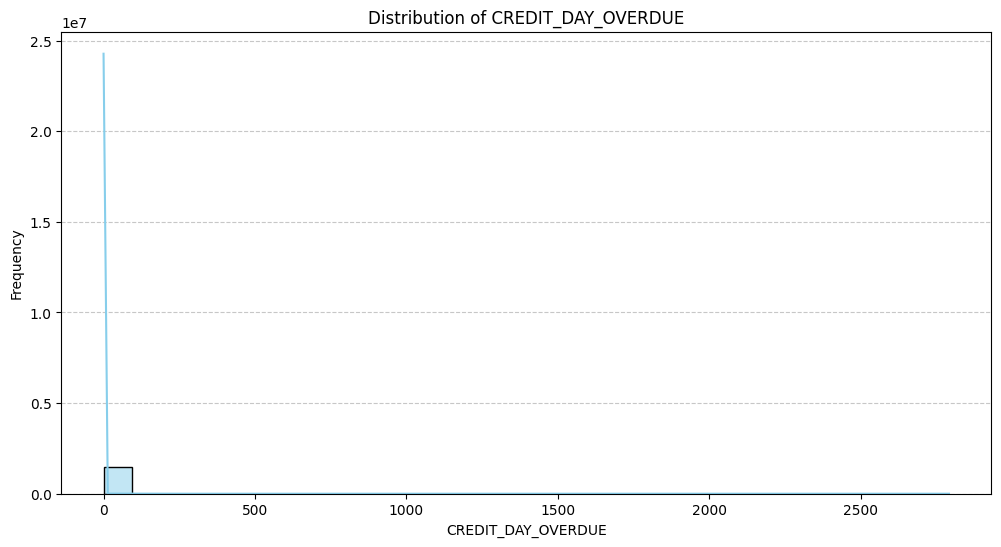

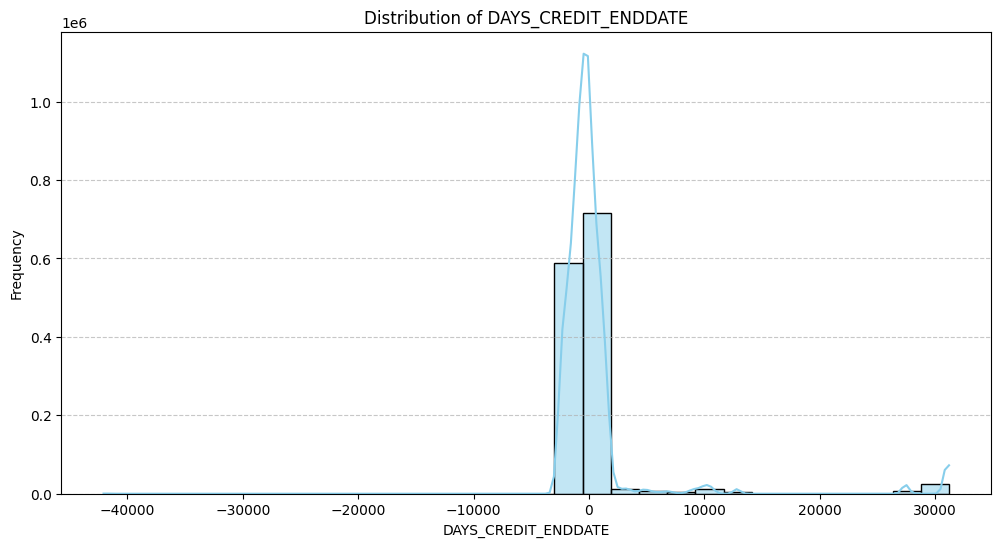

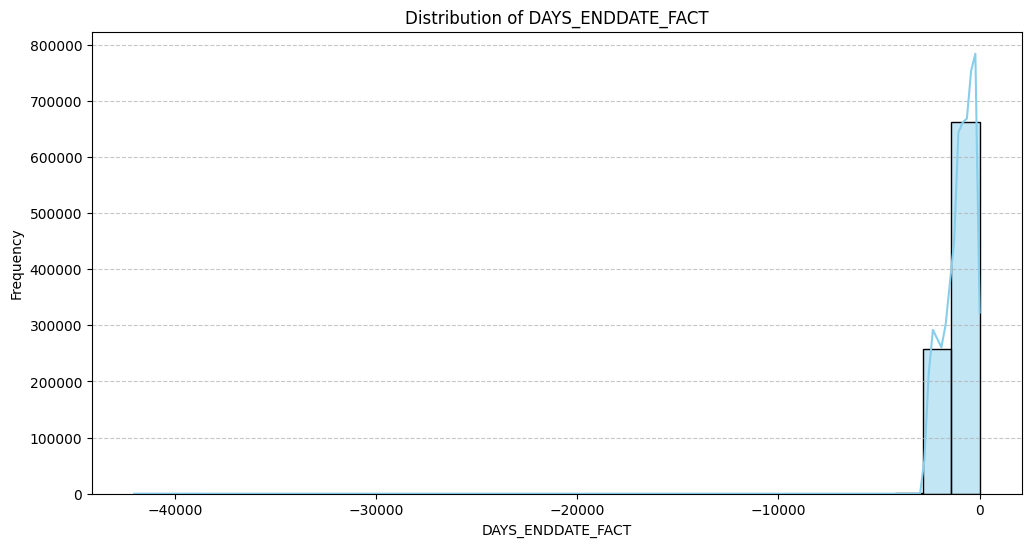

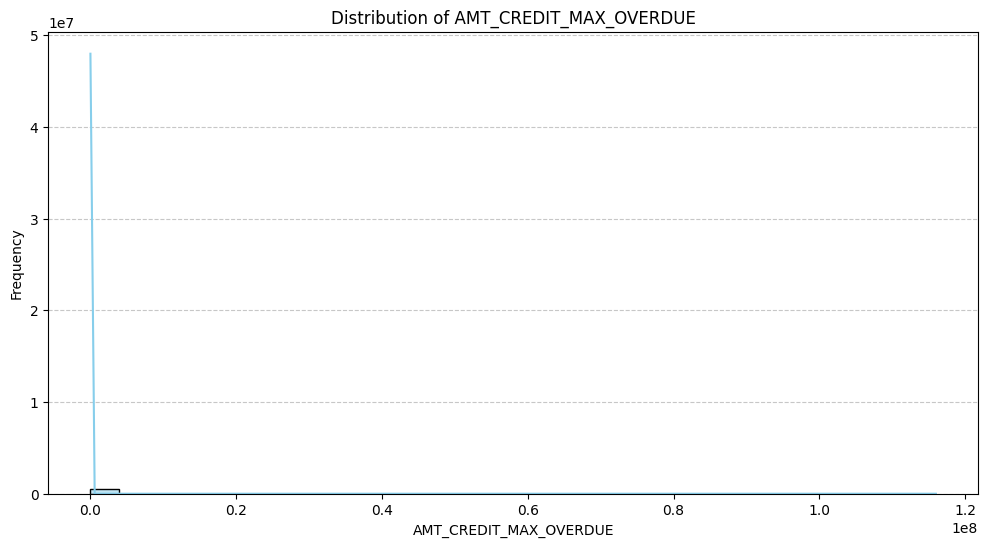

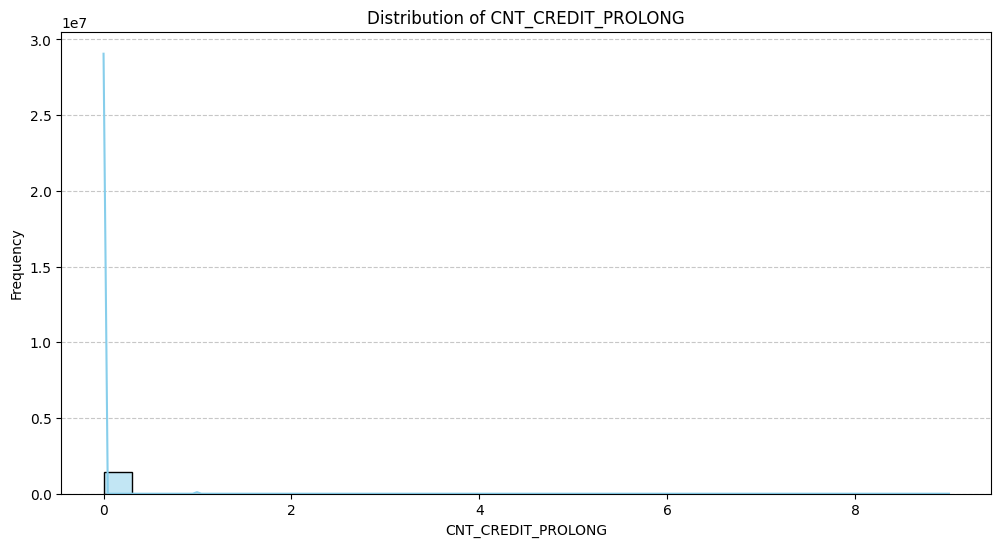

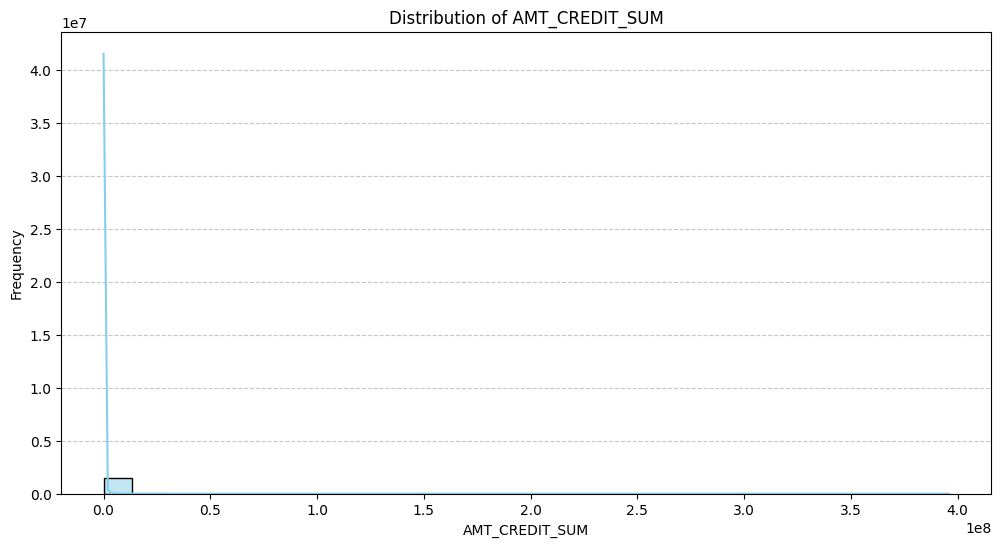

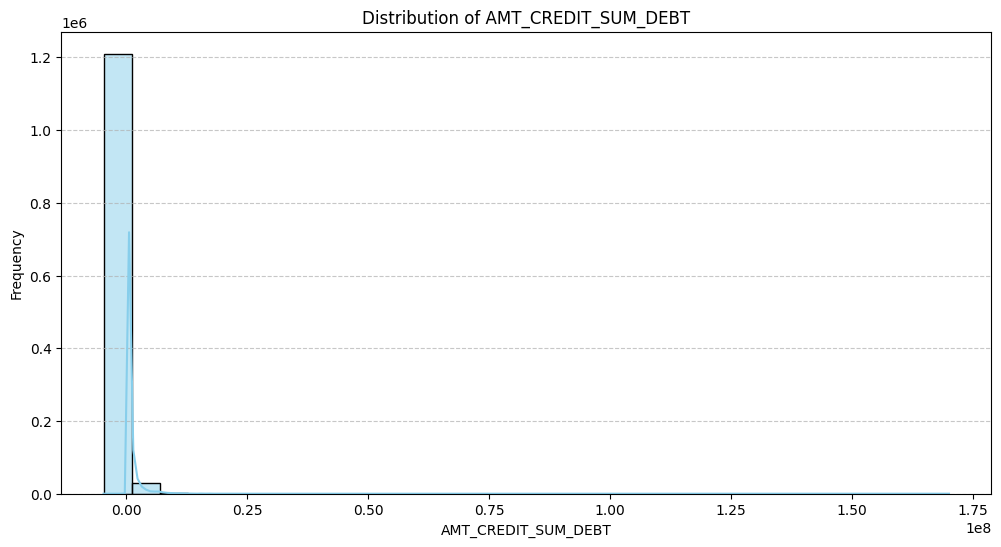

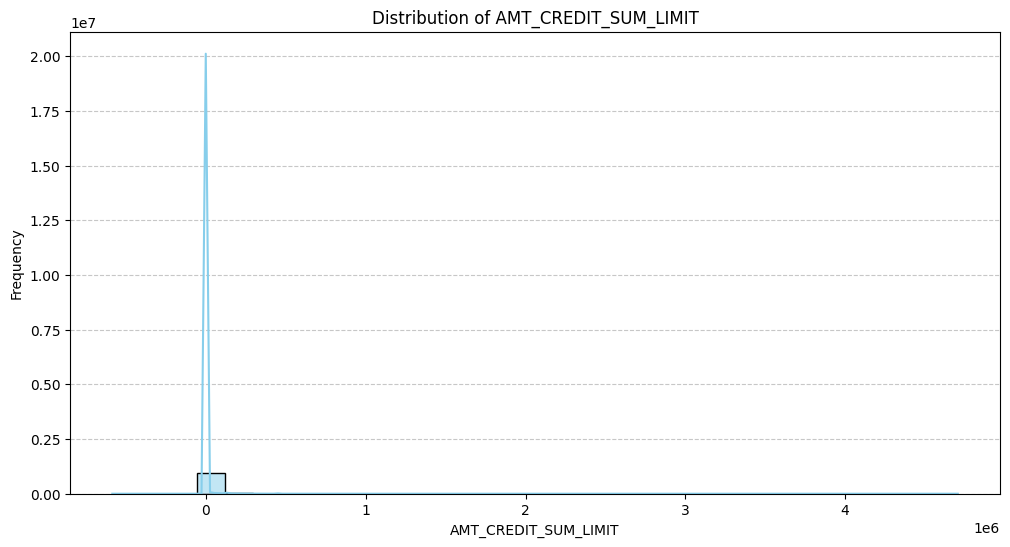

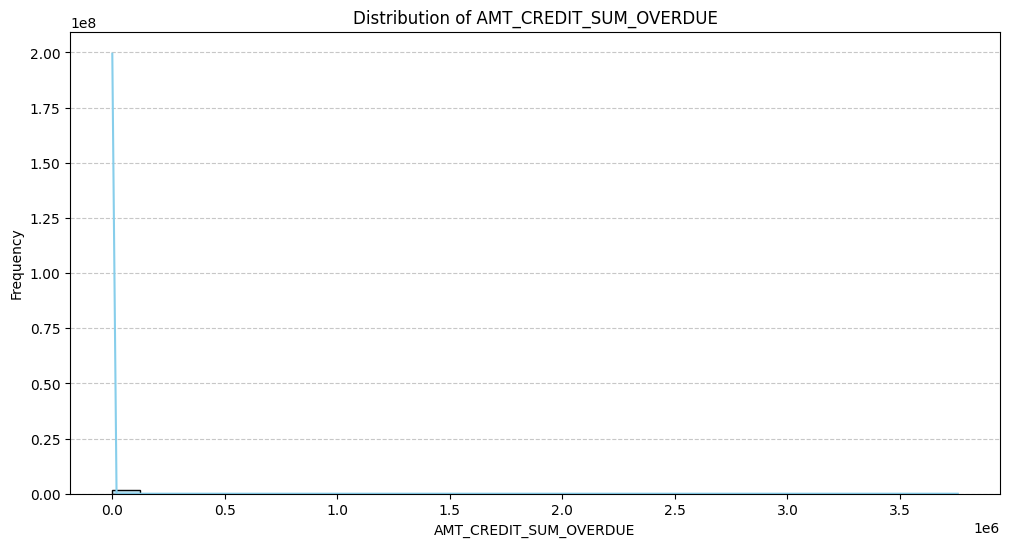

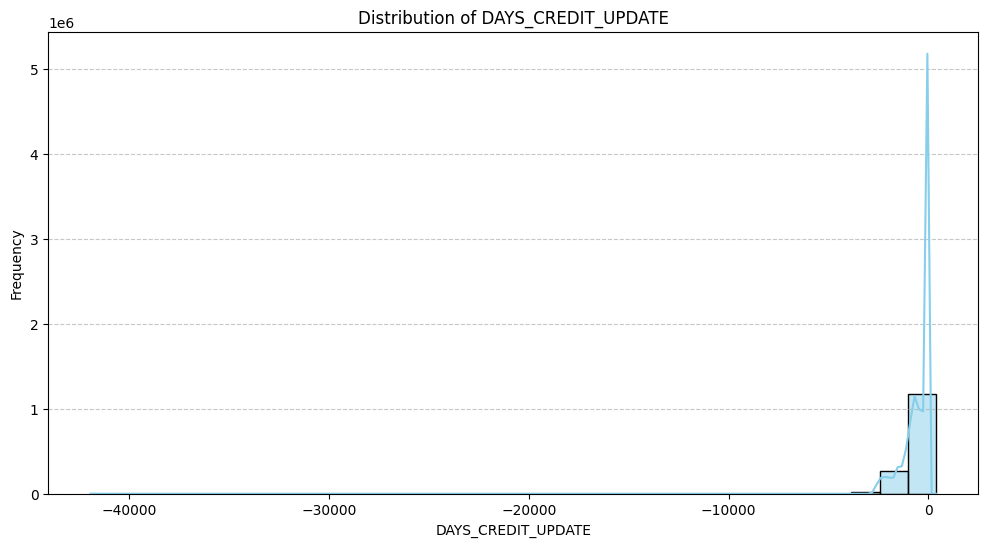

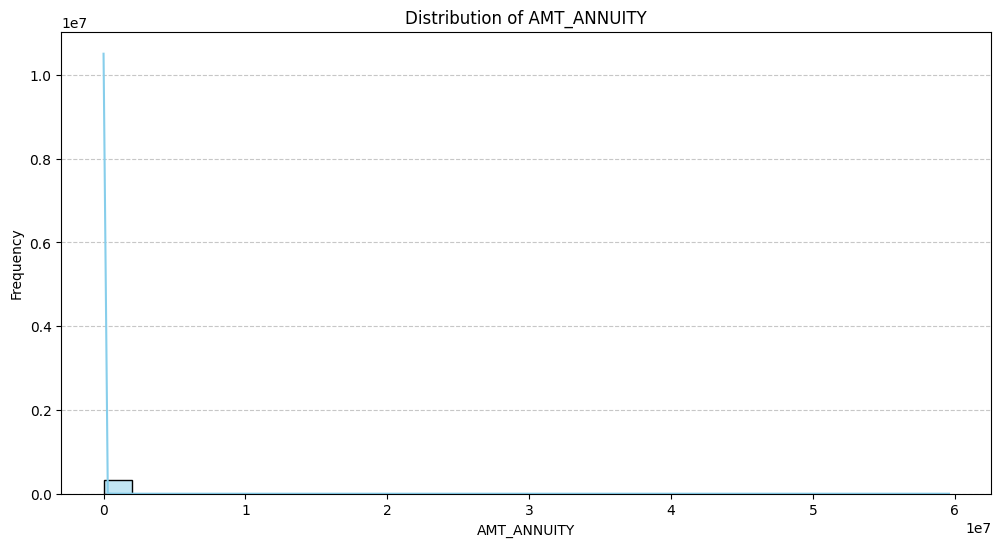

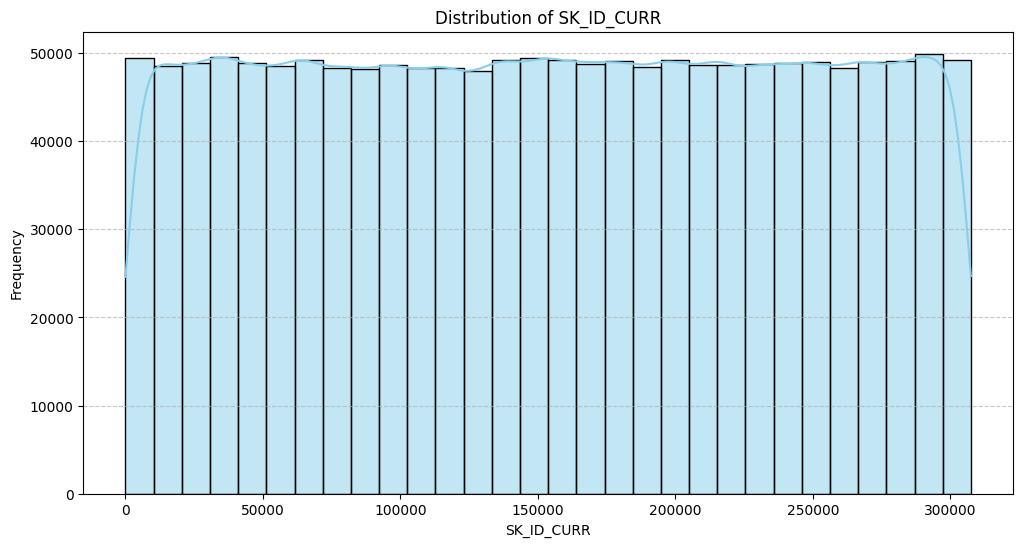

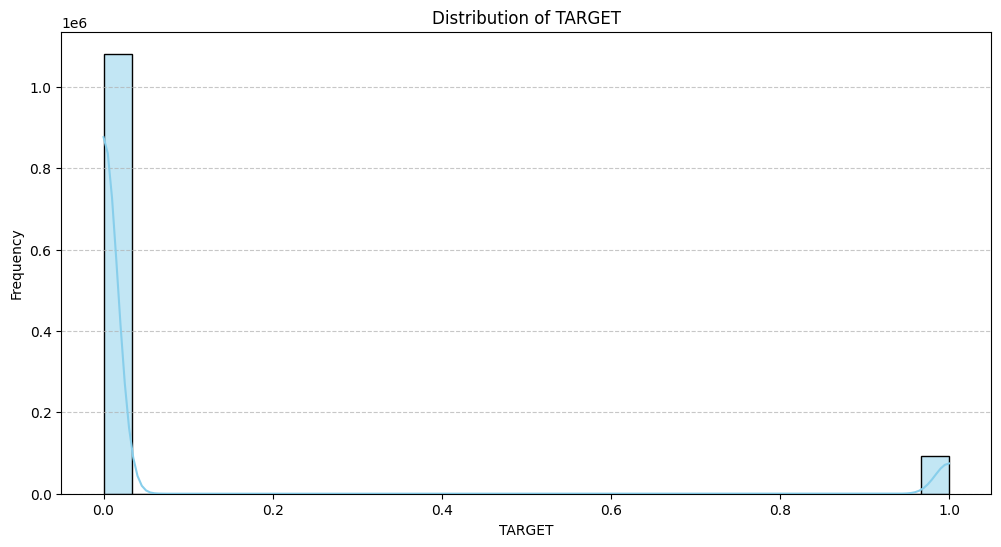

In [12]:
analyze_numeric_relationships(merged_bureau)

## Analyze target relationships

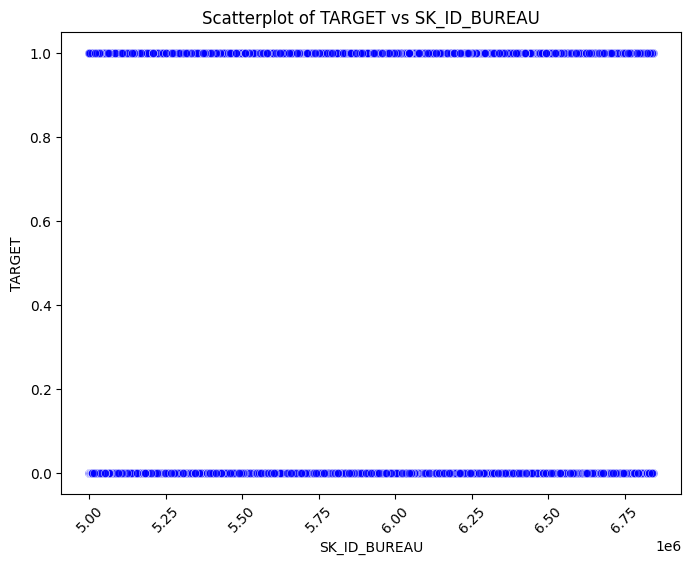

Insufficient data in one of the groups for SK_ID_BUREAU. Skipping...


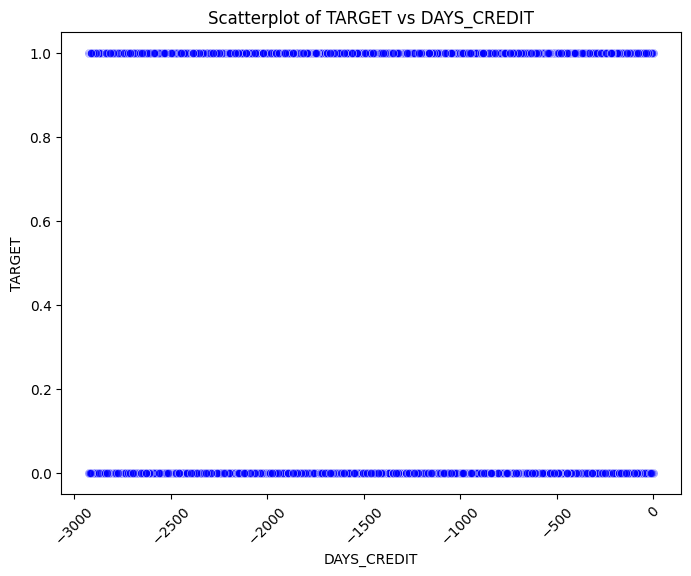

Insufficient data in one of the groups for DAYS_CREDIT. Skipping...


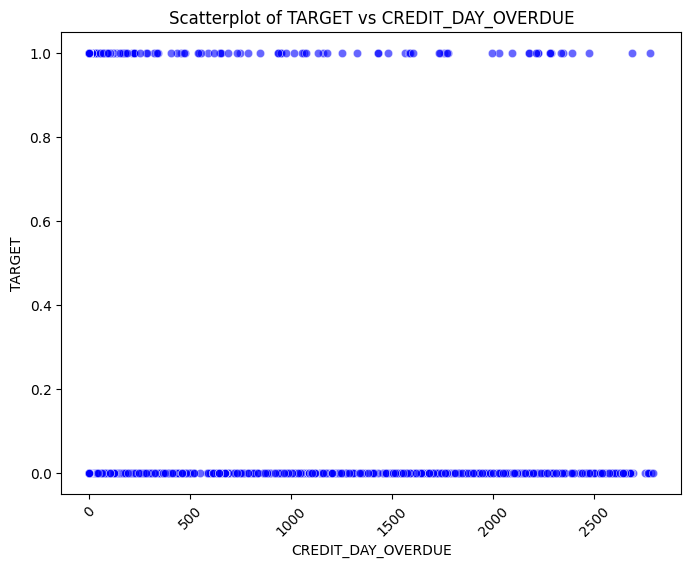

Insufficient data in one of the groups for CREDIT_DAY_OVERDUE. Skipping...


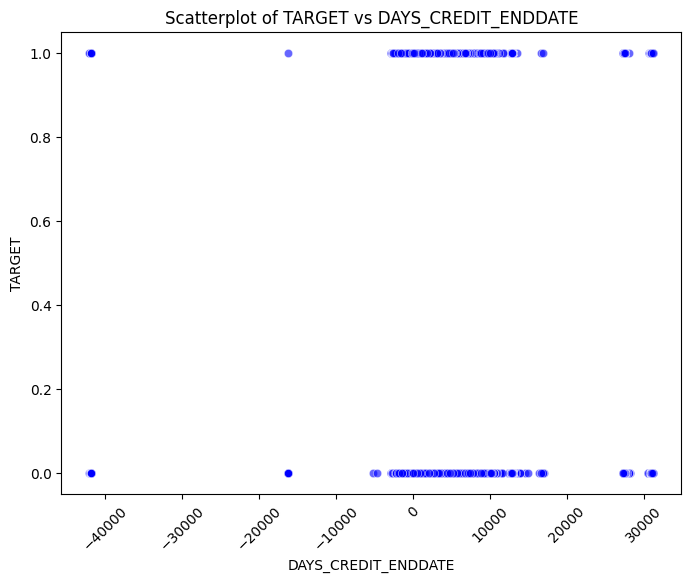

Insufficient data in one of the groups for DAYS_CREDIT_ENDDATE. Skipping...


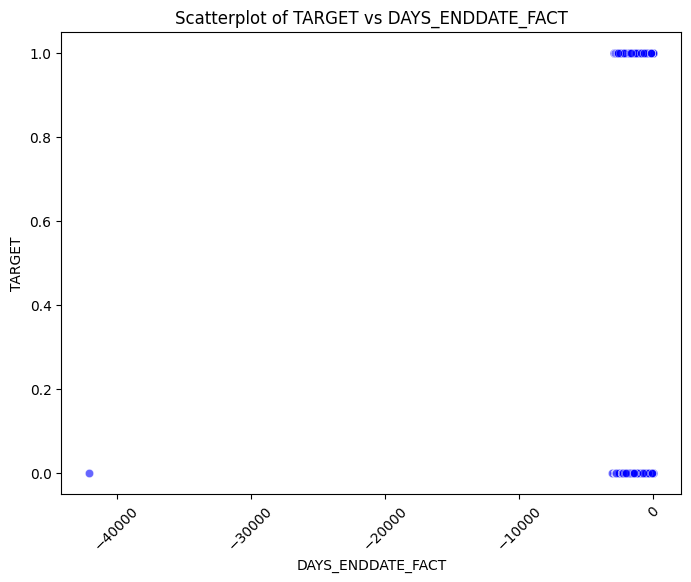

Insufficient data in one of the groups for DAYS_ENDDATE_FACT. Skipping...


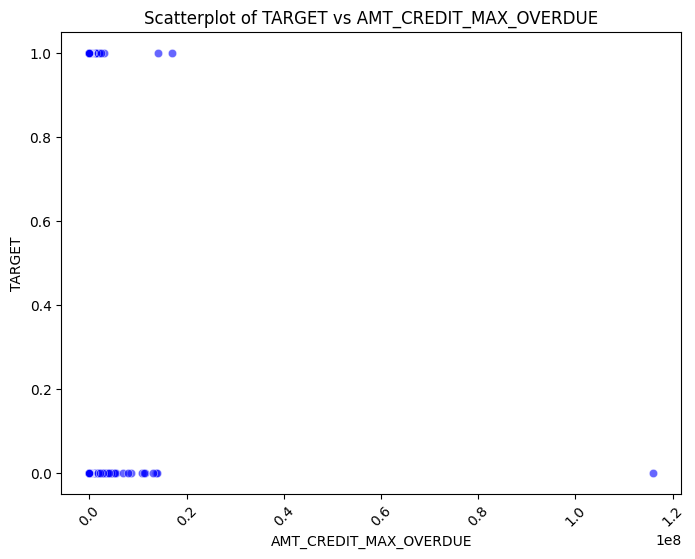

Insufficient data in one of the groups for AMT_CREDIT_MAX_OVERDUE. Skipping...


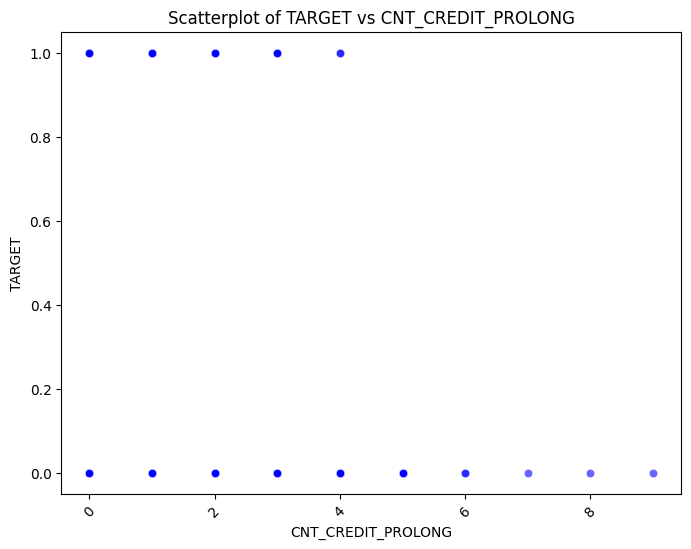

Insufficient data in one of the groups for CNT_CREDIT_PROLONG. Skipping...


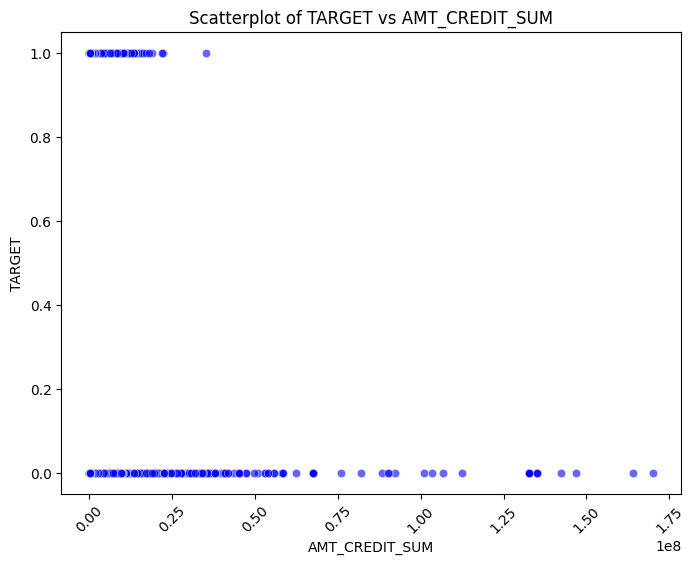

Insufficient data in one of the groups for AMT_CREDIT_SUM. Skipping...


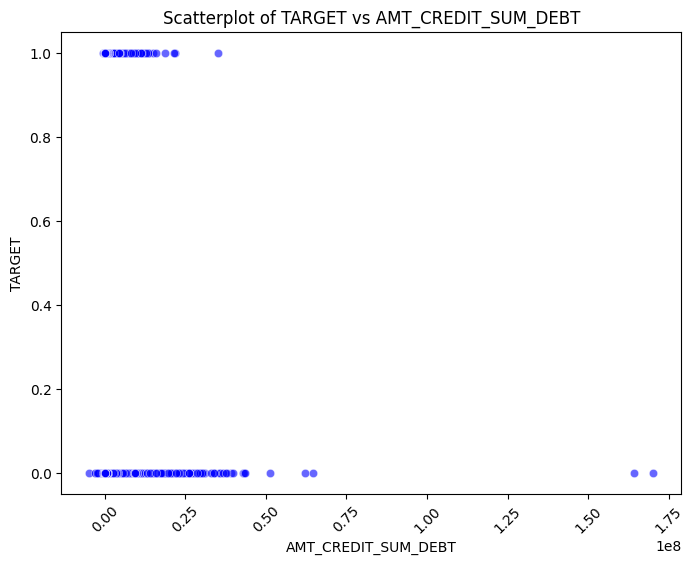

Insufficient data in one of the groups for AMT_CREDIT_SUM_DEBT. Skipping...


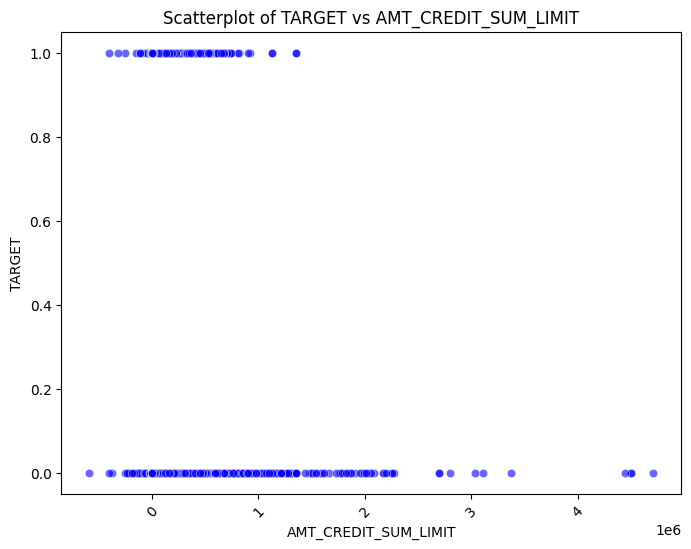

Insufficient data in one of the groups for AMT_CREDIT_SUM_LIMIT. Skipping...


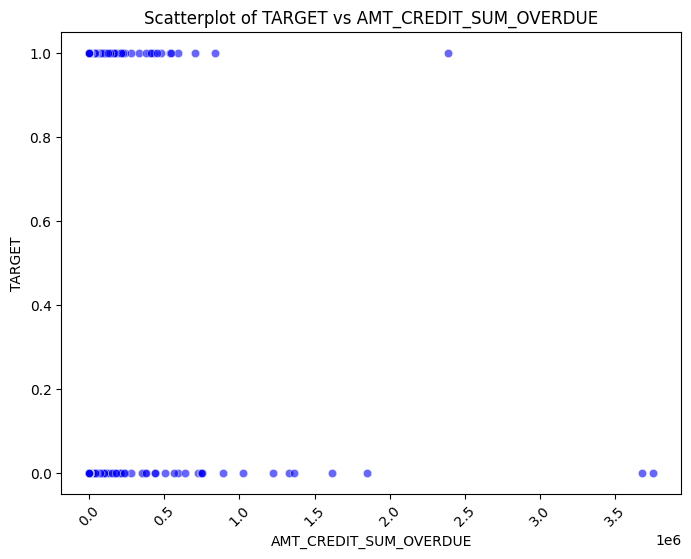

Insufficient data in one of the groups for AMT_CREDIT_SUM_OVERDUE. Skipping...


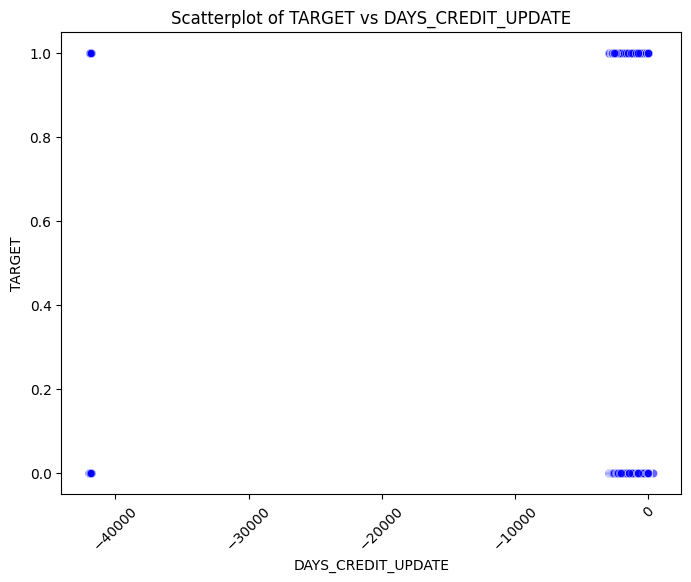

Insufficient data in one of the groups for DAYS_CREDIT_UPDATE. Skipping...


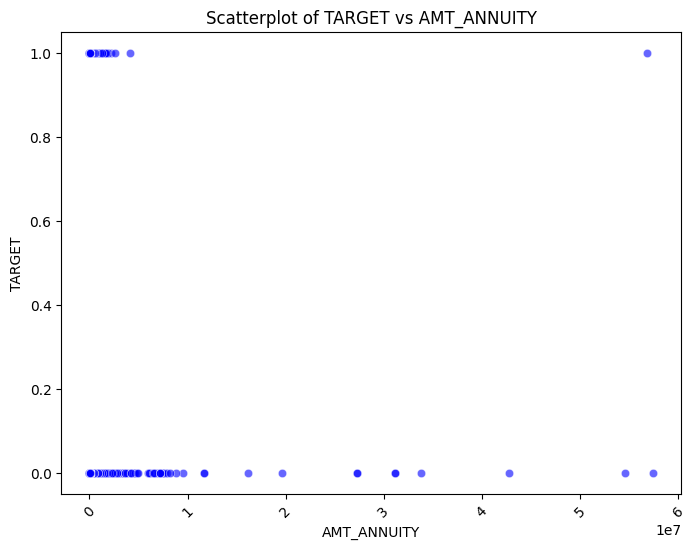

Insufficient data in one of the groups for AMT_ANNUITY. Skipping...


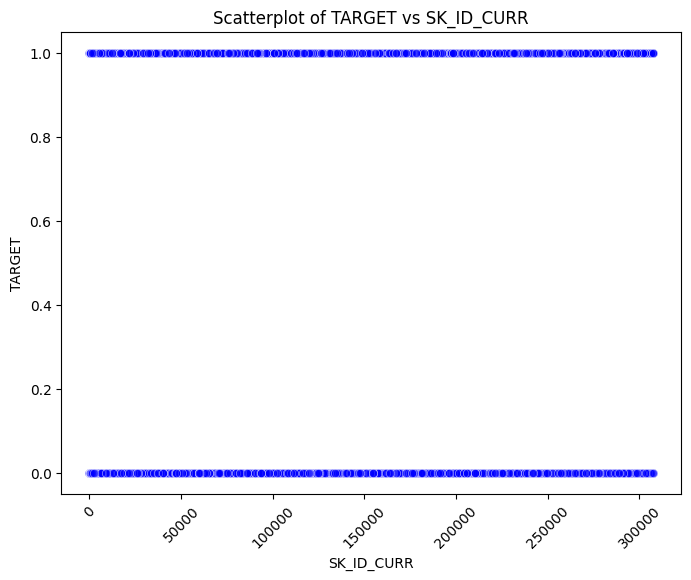

Insufficient data in one of the groups for SK_ID_CURR. Skipping...


c:\Users\TRITON\OneDrive - National Economics University\NEU\NEU\lap trinh\Data preparation and Visualization\Final project\data prep\eda_combined.py:465: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y=target_col, data=sample_data, ci=None, palette="muted")
c:\Users\TRITON\OneDrive - National Economics University\NEU\NEU\lap trinh\Data preparation and Visualization\Final project\data prep\eda_combined.py:465: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y=target_col, data=sample_data, ci=None, palette="muted")


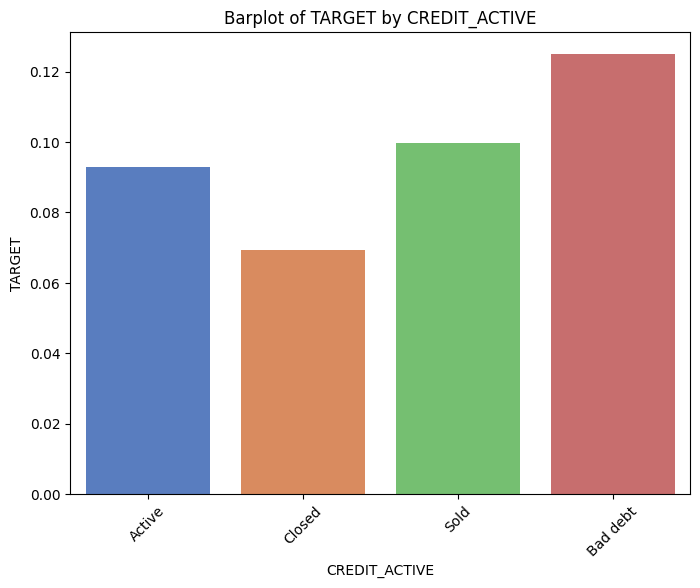

Chi-square Test Results for CREDIT_ACTIVE vs TARGET: Chi2: 2141.6382, p-value: 0.0000
There is a statistically significant relationship.



c:\Users\TRITON\OneDrive - National Economics University\NEU\NEU\lap trinh\Data preparation and Visualization\Final project\data prep\eda_combined.py:465: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y=target_col, data=sample_data, ci=None, palette="muted")
c:\Users\TRITON\OneDrive - National Economics University\NEU\NEU\lap trinh\Data preparation and Visualization\Final project\data prep\eda_combined.py:465: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y=target_col, data=sample_data, ci=None, palette="muted")


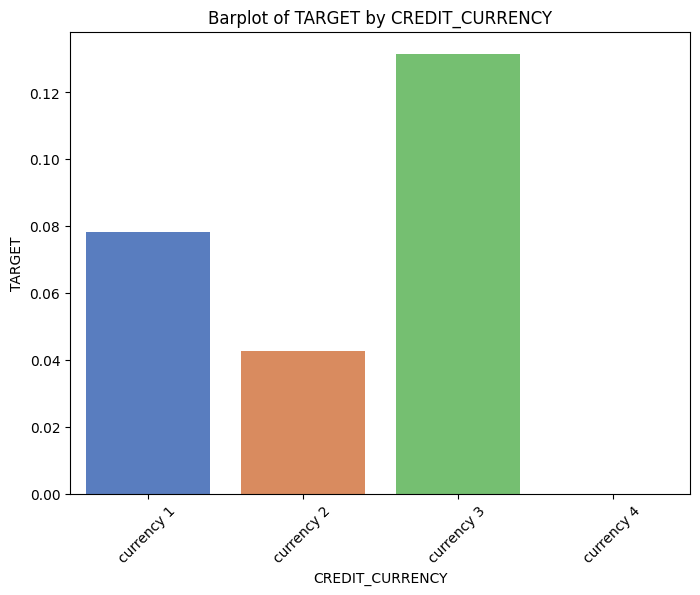

Chi-square Test Results for CREDIT_CURRENCY vs TARGET: Chi2: 19.8081, p-value: 0.0002
There is a statistically significant relationship.



c:\Users\TRITON\OneDrive - National Economics University\NEU\NEU\lap trinh\Data preparation and Visualization\Final project\data prep\eda_combined.py:465: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y=target_col, data=sample_data, ci=None, palette="muted")
c:\Users\TRITON\OneDrive - National Economics University\NEU\NEU\lap trinh\Data preparation and Visualization\Final project\data prep\eda_combined.py:465: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y=target_col, data=sample_data, ci=None, palette="muted")


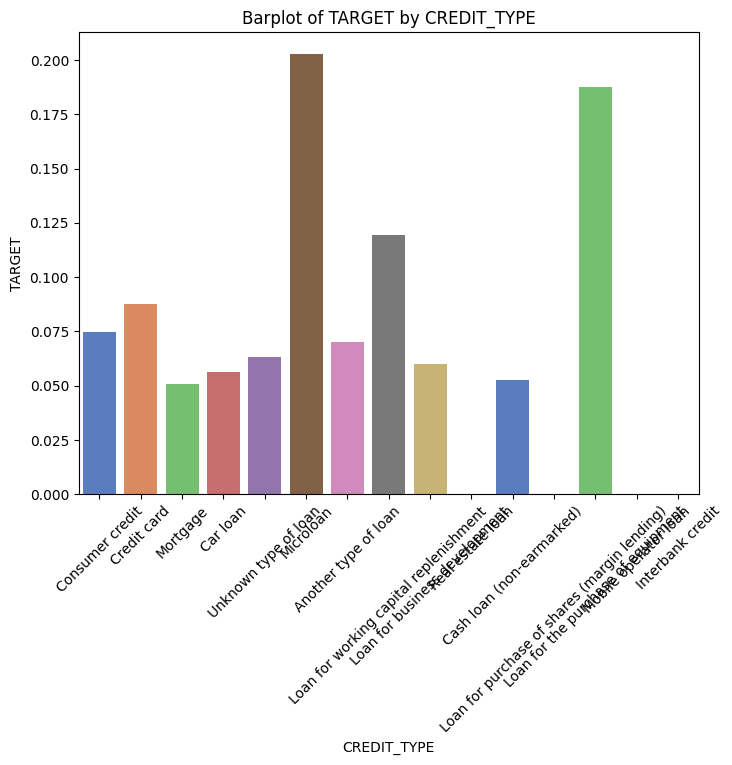

Chi-square Test Results for CREDIT_TYPE vs TARGET: Chi2: 2318.8819, p-value: 0.0000
There is a statistically significant relationship.



In [13]:
analyze_target_relationship(merged_bureau, 'TARGET', bureau.columns)